# ML Modelling and Evaluation

## Objectives

In this notebook, we build and evaluate machine learning models to predict **electricity cost** based on the cleaned and preprocessed dataset created in the previous notebook.

The main objectives of this notebook are:
* To split the prepared dataset into training and test set
* To train a small number of suitable regression models
* To compare model performance using standard regression metrics
* To select a final model based on both performance and interpretability
* To clearly communicate model results in a way that is easy to understand

This notebook focuses on **modelling and evaluation**, while feature cleaning and feature engineering were handled in earlier steps.

## Inputs

* outputs/datasets/cleaned/ElectricityCostCleaned.csv

## Outputs

* Trained regression models
* Model performance metrics (R², MAE, RMSE)
* Visual evaluation of predictions (actual vs predicted)
* Identification of the final selected model
* Insights into which features most strongly influence electricity cost

## Additional Comments

* This notebook supports **Business Requirement 2** by developing and evaluating a reliable model for predicting electricity cost.
* All modelling decisions are explained step by step to maintain interpretability and reproducibility.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-TBC-/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-TBC-'

---

# Load Data & Split Train/Test Set

## Import libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Load the cleaned dataset

In [5]:
file_path = "outputs/datasets/cleaned/ElectricityCostCleaned.csv"
df = pd.read_csv(file_path)

# Quick overview
print(f"Dataset shape: {df.shape}")
print(df.head())

Dataset shape: (10000, 15)
   site_area  water_consumption  recycling_rate  utilisation_rate  \
0       1360             2519.0              69                52   
1       4272             2324.0              50                76   
2       3592             2701.0              20                94   
3        966             1000.0              13                60   
4       4926             5990.0              23                65   

   air_quality_index  issue_resolution_time  resident_count  electricity_cost  \
0                188                      1              72            1420.0   
1                165                     65             261            3298.0   
2                198                     39             117            3115.0   
3                 74                      3              35            1575.0   
4                 32                     57             185            4301.0   

   structure_type_Industrial  structure_type_Mixed-use  \
0            

## Inspect data

Confirm column types, that the dataset is cleaned, and no missing values exist.

In [6]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   site_area                   10000 non-null  int64  
 1   water_consumption           10000 non-null  float64
 2   recycling_rate              10000 non-null  int64  
 3   utilisation_rate            10000 non-null  int64  
 4   air_quality_index           10000 non-null  int64  
 5   issue_resolution_time       10000 non-null  int64  
 6   resident_count              10000 non-null  int64  
 7   electricity_cost            10000 non-null  float64
 8   structure_type_Industrial   10000 non-null  bool   
 9   structure_type_Mixed-use    10000 non-null  bool   
 10  structure_type_Residential  10000 non-null  bool   
 11  resident_group_low          10000 non-null  bool   
 12  resident_group_medium       10000 non-null  bool   
 13  resident_group_none         1000

## Split into features and target

Our **target variable** is the electricity cost column. Features are all other columns.

In [7]:
X = df.drop(['electricity_cost'], axis=1)
y = df['electricity_cost']

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (10000, 14), Target shape: (10000,)


## Split into train and test set

Standard split: 80% train, 20% test, using a fixed random seed for reproducibility.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0
)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (8000, 14), (8000,)
Test set: (2000, 14), (2000,)


---

# Baseline Model: Linear Regression

In this section, we will build a **baseline linear regression model** to predict electricity cost. This model serves as a reference point for future, more sophisticated models. We will evaluate its performance using standard regression metrics and visualize predictions to gain insight into model behavior.

## Baseline Purpose

Linear regression is a simple, interpretable model. Starting with it allows us to:
* Quickly assess how well a linear relationship can explain electricity cost.
* Establish baseline performance metrics (R², MAE, RMSE) before trying more complex models.
* Understand the influence of individual features on predictions in a straightforward manner.

## Business Insight

Even as a baseline, the model provides insight into electricity costs:
* High R² (~0.92) indicates that the model explains most of the variance in electricity cost.
* The MAE (~241) shows average deviation of predictions from actual costs, which can inform budget forecasts or operational planning.

## Import required libraries

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Create the baseline model

In [10]:
baseline_model = LinearRegression()

## Fit model on the training set

In [11]:
baseline_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Predict on train and test sets

In [12]:
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

## Evaluate performance

In [13]:
def evaluate_regression(y_true, y_pred, dataset_name="Dataset"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Performance on {dataset_name}:")
    print(f"R2 Score: {r2:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    
    return r2, mae, mse, rmse

In [14]:
train_metrics = evaluate_regression(y_train, y_train_pred, "Train Set")
print("\n")
test_metrics = evaluate_regression(y_test, y_test_pred, "Test Set")

Performance on Train Set:
R2 Score: 0.922
Mean Absolute Error (MAE): 241.591
Mean Squared Error (MSE): 95078.697
Root Mean Squared Error (RMSE): 308.348


Performance on Test Set:
R2 Score: 0.924
Mean Absolute Error (MAE): 241.025
Mean Squared Error (MSE): 94846.851
Root Mean Squared Error (RMSE): 307.972


### Summary Table of Metrics

This table provides a concise view of model performance on train and test sets.

In [15]:
metrics_df = pd.DataFrame({
    'Metric': ['R2', 'MAE', 'MSE', 'RMSE'],
    'Train': train_metrics,
    'Test': test_metrics
}).round(2)
display(metrics_df)

,Metric,Train,Test
0,R2,0.92,0.92
1,MAE,241.59,241.02
2,MSE,95078.70,94846.85
3,RMSE,308.35,307.97


## Feature Importance: Raw vs Standardized Coefficients

Linear regression coefficients provide insights into how each feature influences electricity cost predictions.

* **Raw coefficient** → Shows change in electricity cost per unit increase in the feature (original scale).
* **Standardized coefficient** → Shows change in electricity cost (in standard deviations) per standard deviation increase in the feature. This allows comparison across features on different scales.

We will look at both to understand feature influence.

### Raw coefficients (original scale)

Positive coefficient → feature increases predicted electricity cost.  
Negative coefficient → feature decreases predicted electricity cost.  
Magnitude indicates the strength of the influence.

*Raw feature importance*

In [16]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': baseline_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False).round(2)

display(feature_importance)

,Feature,Coefficient
7,structure_type_Industrial,586.09
8,structure_type_Mixed-use,-555.89
12,resident_group_none,405.39
9,structure_type_Residential,150.50
10,resident_group_low,70.98
11,resident_group_medium,51.71
3,utilisation_rate,10.29
6,resident_count,2.67
5,issue_resolution_time,1.88
2,recycling_rate,-1.09


#### Interpretation (raw coefficients)

* `structure_type_Industrial` (+586): Industrial structures strongly increase predicted electricity cost.
* `structure_type_Mixed-use` (-556): Mixed-use structures decrease predicted cost.
* `resident_group_none` (+405): Areas with no specific resident group have higher predicted electricity cost.
* Smaller positive or negative coefficients (e.g., `utilisation_rate`, `site_area`) have minor impact per unit change.

**Note:** Raw coefficients are influenced by the feature scale (unit size). For example, `site_area` has small raw coefficient, but varies widely across the dataset.

### Standardized Coefficients (comparative influence)

Standardizing features allows us to compare importance across features regardless of their scale.

*Standardize features and target*

In [17]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
y_train_std = (y_train - y_train.mean()) / y_train.std()

Fit linear regression on standardized data

In [18]:
baseline_model_std = LinearRegression()
baseline_model_std.fit(X_train_std, y_train_std)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Standardize feature importance

In [19]:
std_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Standardized_Coefficient': baseline_model_std.coef_
}).sort_values(by='Standardized_Coefficient', key=abs, ascending=False).round(4)

display(std_feature_importance)

,Feature,Standardized_Coefficient
0,site_area,0.7212
6,resident_count,0.2585
8,structure_type_Mixed-use,-0.2277
3,utilisation_rate,0.1896
7,structure_type_Industrial,0.1621
12,resident_group_none,0.1505
1,water_consumption,0.0986
9,structure_type_Residential,0.0371
5,issue_resolution_time,0.0351
2,recycling_rate,-0.0231


#### Interpretation (standardized coefficients)

* `site_area` (0.721) is now the largest, indicating that relative to its variability in the dataset, it has the strongest influence on electricity cost.
* `resident_count` (0.259) and `structure_type_Mixed-use` (-0.228) follow in importance.
* `structure_type_Industrial` (0.162) drops in rank because its variability is limited (0/1 encoding), even though each industrial building has a large raw effect.

**Key Takeaway:** Standardized coefficients allow us to compare the relative influence of all features on predictions, accounting for their scale differences. Raw coefficients are more useful for operational interpretation (actual units).

### Visualizing Feature Importance

Both raw and standardized coefficients can be visualized to make interpretation easier.

*Raw coefficients plot*

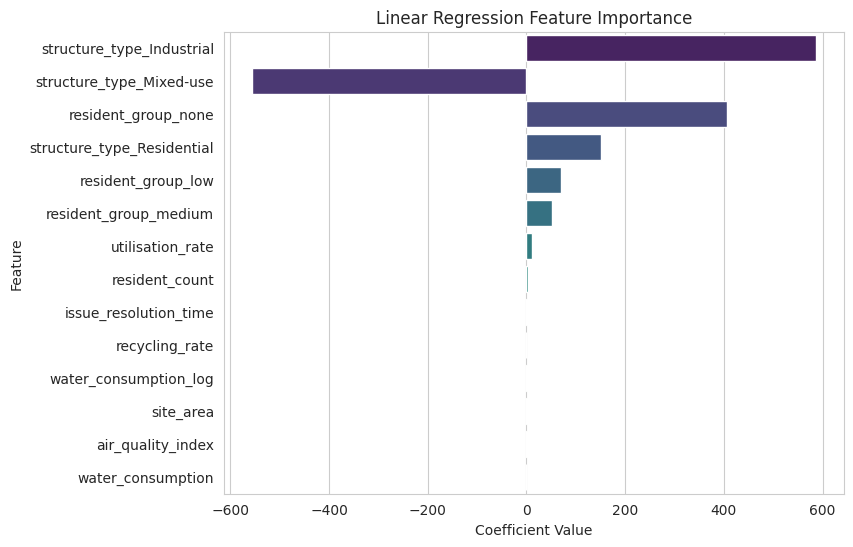

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=feature_importance,
    x='Coefficient',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title("Linear Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

*Standardized coefficients plot*

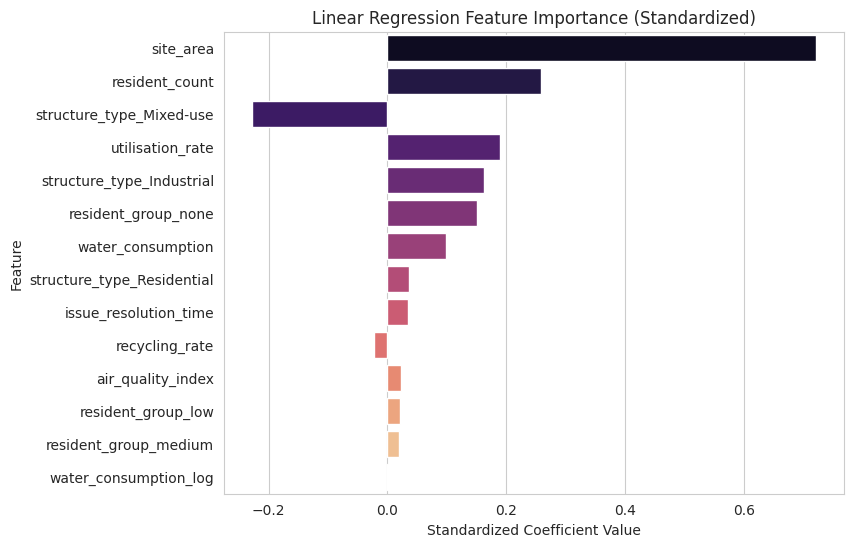

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=std_feature_importance,
    x='Standardized_Coefficient',
    y='Feature',
    hue='Feature',
    palette='magma',
    legend=False
)
plt.title("Linear Regression Feature Importance (Standardized)")
plt.xlabel("Standardized Coefficient Value")
plt.ylabel("Feature")
plt.show()

**Interpretation of coefficient plots**

* Raw coefficient plot shows features with the largest per-unit impact, e.g., industrial and mixed-use structures.
* Standardized coefficient plot shows comparative influence accounting for feature variability: `site_area` is now most influential, followed by `resident_count` and mixed-use structures.
* Combining both plots provides a full picture: raw for operational impact, standardized for comparative influence.


### Visual Evaluation

Visualizing the predictions helps understand model behavior, detect biases, and identify potential outliers.

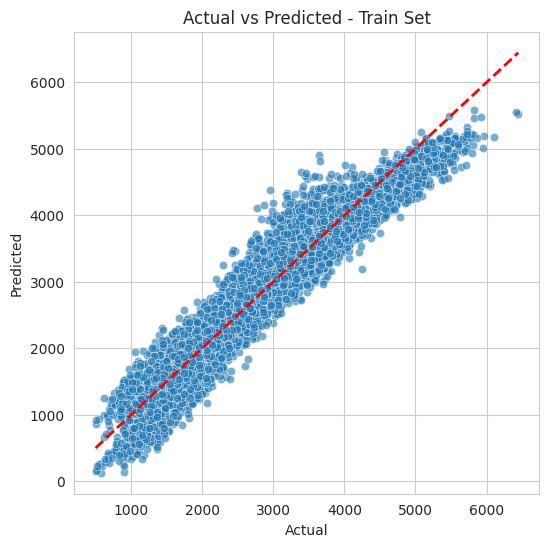

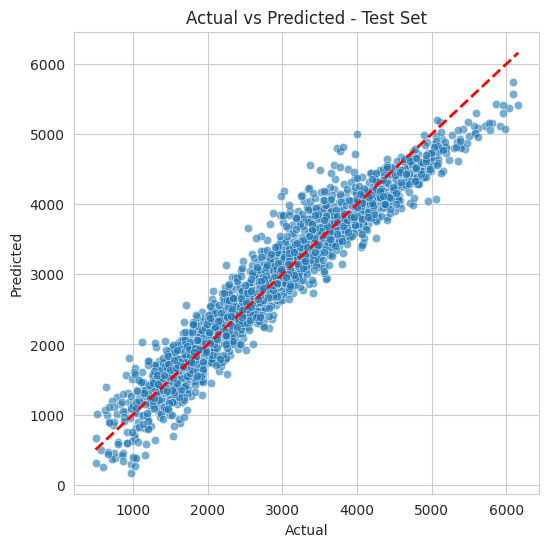

In [22]:
def plot_actual_vs_predicted(y_true, y_pred, dataset_name="Dataset"):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {dataset_name}")
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Train Set")
plot_actual_vs_predicted(y_test, y_test_pred, "Test Set")

### Residual Plots

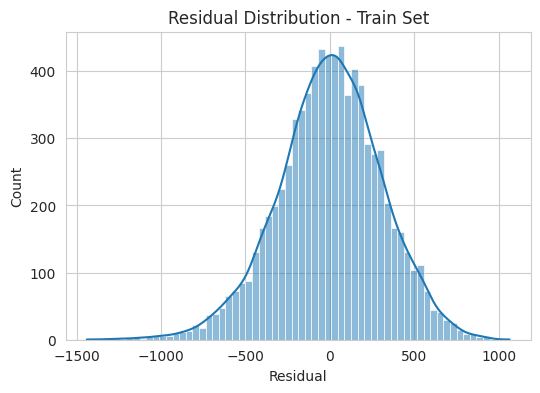

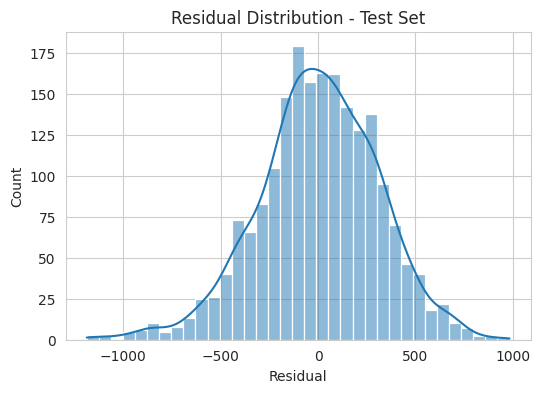

In [23]:
def plot_residuals(y_true, y_pred, dataset_name="Dataset"):
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residual")
    plt.title(f"Residual Distribution - {dataset_name}")
    plt.show()

plot_residuals(y_train, y_train_pred, "Train Set")
plot_residuals(y_test, y_test_pred, "Test Set")

## Interpretation of the results

* **R² ~0.92** on both train and test sets: The model explains the majority of variance in electricity cost.
* **MAE ~241**: On average, predictions deviate by about 241 units from actual costs.
* **Scatter plots**: Most points lie close to the red identity line, confirming high predictive accuracy.
* **Residuals**: Distribution appears approximately normal, with no major skew or bias.
* **Feature Importance**: Structure type, site characteristics, and resident-related variables are key drivers of electricity cost.

**Next Steps:** Build a tree-based regressor (Random Forest) to capture potential non-linear relationships and further improve predictive performance.

---

# Alternative Model: Tree-Based Regressor (Random Forest)

In this section, we build a **Random Forest Regressor** to predict electricity cost.
Random Forest is a tree-based ensemble method than can capture *non-linear relationships* and interactions between features, which a linear regression might miss.

We will evaluate its performance using the same metrics as before, visualize predictions, and inspect feature importance.

## Model Purpose (Random Forest)

The Random Forest model aims to:
* Capture complex, non-linear relationships between features and electricity cost.
* Potentially improve predictive performance over the linear regression baseline.
* Identify which features are most influential in a tree-based, non-linear context.

## Business Insight

Even if Random Forest slightly improves metrics, it may reveal different patterns in the drivers of electricity cost, e.g. interactions between site area, resident count, and structure type. This can guide operational decisions or further analysis.

## Import required libraries

In [24]:
from sklearn.ensemble import RandomForestRegressor

## Create the Random Forest model

We start with default hyperparameters for simplicity.

In [25]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=0,
    n_jobs=-1
)

## Fit the model on the training set

In [26]:
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

## Predict on train and test sets

In [27]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

## Evaluate performance

In [28]:
train_metrics_rf = evaluate_regression(y_train, y_train_pred_rf, "Train Set (RF)")
print("\n")
test_metrics_rf = evaluate_regression(y_test, y_test_pred_rf, "Test Set (RF)")

Performance on Train Set (RF):
R2 Score: 0.994
Mean Absolute Error (MAE): 65.161
Mean Squared Error (MSE): 6778.663
Root Mean Squared Error (RMSE): 82.333


Performance on Test Set (RF):
R2 Score: 0.962
Mean Absolute Error (MAE): 172.412
Mean Squared Error (MSE): 47490.940
Root Mean Squared Error (RMSE): 217.924


### Summary Table of Metrics

In [29]:
metrics_rf_df = pd.DataFrame({
    'Metric': ['R2', 'MAE', 'MSE', 'RMSE'],
    'Train': train_metrics_rf,
    'Test': test_metrics_rf
}).round(2)

display(metrics_rf_df)

,Metric,Train,Test
0,R2,0.99,0.96
1,MAE,65.16,172.41
2,MSE,6778.66,47490.94
3,RMSE,82.33,217.92


### Interpretation of Model Performance (Random Forest)

The Random Forest model shows a clear improvement over the baseline linear regression model:

* **Train set performance** is very strong (R² ≈ 0.99, RMSE ≈ 82), indicating that the model fits the training data extremely well.
* **Test set performance** remains high (R² ≈ 0.96, RMSE ≈ 218), showing strong generalization to unseen data.
* The increase in error from train to test suggests **mild overfitting**, which is expected for flexible, tree-based models, but the gap remains within acceptable limits.

Compared to the baseline model:
* MAE (Mean absolute error) decreased substantially (from ~241 to ~172 on the test set)
* RMSE (Root Mean Square Error) also improved notably, indicating more accurate predictions overall.

Overall, the Random Forest model captures complex, non-linear relationships that the linear regression model cannot.

## Feature Importance: Random Forest

Random Forest provides a measure of feature importance based on how *how much each feature reduces impurity* across all trees.

In [30]:
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).round(4)

display(rf_feature_importance)

,Feature,Importance
0,site_area,0.7706
8,structure_type_Mixed-use,0.0756
6,resident_count,0.0475
3,utilisation_rate,0.0408
7,structure_type_Industrial,0.0294
10,resident_group_low,0.0074
5,issue_resolution_time,0.0056
4,air_quality_index,0.0052
2,recycling_rate,0.0051
1,water_consumption,0.0047


## Visualizing Feature Importance

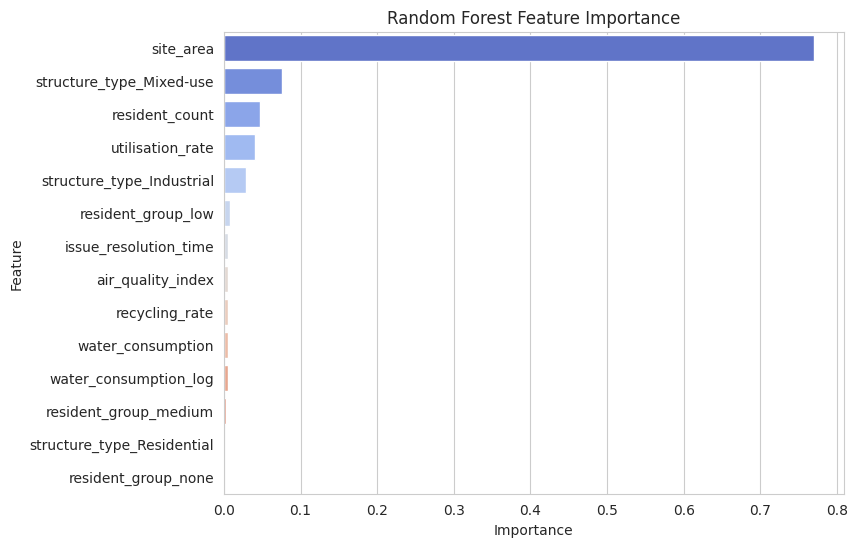

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=rf_feature_importance,
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='coolwarm',
    legend=False
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Interpretation of Feature Importance (Random Forest)

Random Forest feature importance highlights which variables contribute most to prediction accuracy:

* **`site area`** dominates model importance (~77%), indicating that overall property size is the strongest driver of electricity cost.
* **Structure type**, especially `structure_type_Mixed-use` and `structure_type_Industrial`, plays a meaningful but secondary role.
* **Operational factors** such as `resident_count` and `utilisation_rate` further contribute to predictions.
* Resident group variables and environmental indicators show relatively minor influence.

Unlike linear regression coefficients, Random Forest importance reflects **predictive contribution**, not direction or unit impact.

This aligns with business intuition: larger sites with higher usage intensity naturally incur higher electricity cost.

## Visual Evaluation

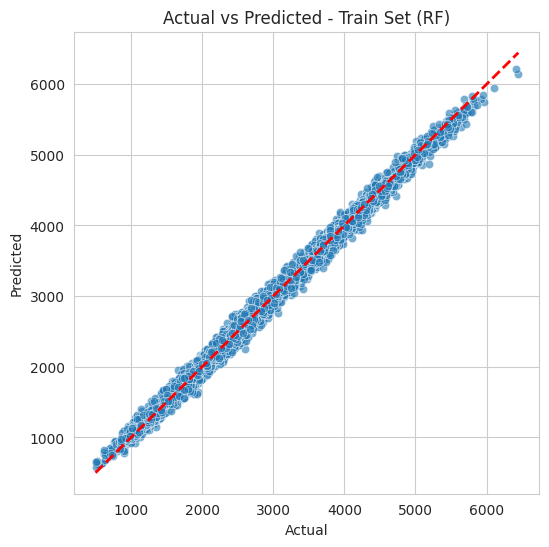

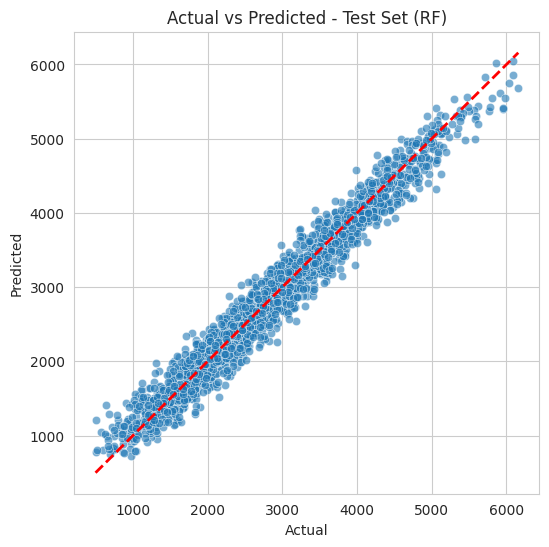

In [32]:
plot_actual_vs_predicted(y_train, y_train_pred_rf, "Train Set (RF)")
plot_actual_vs_predicted(y_test, y_test_pred_rf, "Test Set (RF)")

### Interpretation of Prediction Plots (Random Forest)

* In the **training set**, predictions lie very close to the identity line, confirming the model's strong fit.
* In the **test set**, predictions remain tightly clustered around the identity line, though with slightly increased dispersion.
* Compared to the baseline model, Random Forest predictions are visibly closer to the ideal prediction line in both train and test sets.

This visual evidence supports the numerical metrics and confirms improved predictive accuracy, particularly for higher electricity cost values.

### Residual Plots

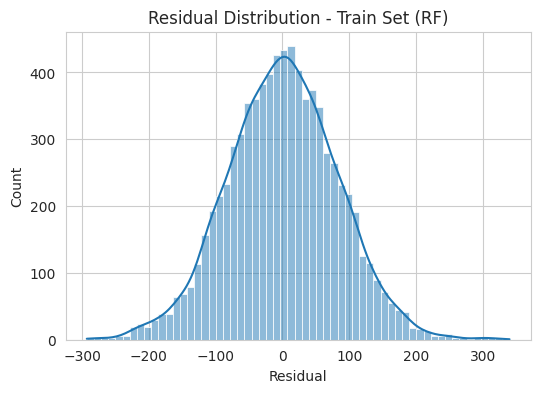

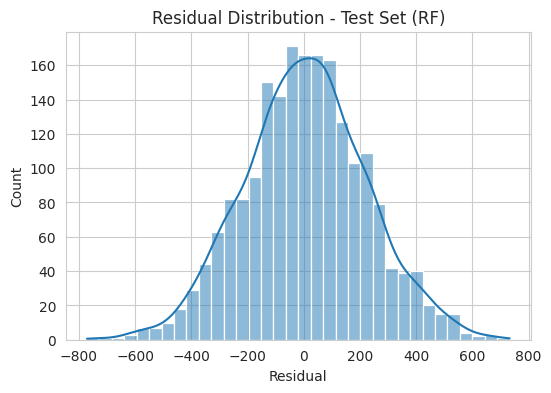

In [33]:
plot_residuals(y_train, y_train_pred_rf, "Train Set (RF)")
plot_residuals(y_test, y_test_pred_rf, "Test Set (RF)")

### Comparison with Baseline Model

| Aspect | Linear Regression | Random Forest |
|--------|-------------------|---------------|
| Interpretability | High | Moderate |
| Captures non-linearity | No | Yes |
| Test R² | ~0.91 | ~0.96 |
| Test RMSE | ~308 | ~218 |
| Overfitting risk | Low | Moderate |

While linear regression is highly interpretable, the Random Forest model delivers superior predictive performance and better captures complex interactions between features.

### Model Selection Consideration

The Random Forest model demonstrates superior predictive accuracy and improved error metrics compared to the baseline linear regression model.

However, the linear regression model remains valuable for interpretability and business insight.

In the next section, we formally evaluate both models against business requirements to determine the most appropriate final model.

---

# Model Comparison and Final Selection

In this section, we compare the performance of the baseline **Linear Regression** model and the **Random Forest Regressor**.
The goal is to select a final model that best balances predictive accuracy, interpretability, and alignment with the business requirement.

*Metrics Comparison Table*

In [34]:
comparison_df = pd.DataFrame({
    'Metric': ['R2', 'MAE', 'RMSE'],
    'Linear Regression (Test)': [0.92, 241.02, 307.97],
    'Random Forest (Test)': [0.96, 172.41, 217.92]
}).round(2)

display(comparison_df)

,Metric,Linear Regression (Test),Random Forest (Test)
0,R2,0.92,0.96
1,MAE,241.02,172.41
2,RMSE,307.97,217.92


### Interpretation of Performance Comparison

* The **Random Forest model** outperforms Linear Regression across all key evaluation metrics on the test set.
* R² increases from ~0.92 to ~0.96, indicating improved explanatory power.
* MAE and RMSE are substantially lower for Random Forest, reflecting more accurate and reliable predictions.
* The improvement is consistent with earlier visual evaluations (actual vs predicted plots).

### Qualitative Model Comparison

| Aspect | Linear Regression | Random Forest |
|--------|-------------------|---------------|
| Predictive accuracy | Good | Excellent |
| Captures non-linear patterns | No | Yes |
| Interpretability | High | Moderate |
| Feature importance clarity | Coefficients (raw & standardized) | Relative importance |
| Risk of overfitting | Low | Moderate |
| Business explainability | Strong | Good |

### Final Model Selection

Based on the comparative evaluation:

* The **Random Forest model** is selected as the **final model** due to its superior predictive performance and ability to capture non-linear relationships.
* The **Linear Regression model** remains valuable as a baseline and interpretability reference but does not match the predictive accuracy required for deployment.

The selected model best satisfies the objective of accurately predicting electricity cost while maintaining acceptable interpretability for business stakeholders.

### Next Step

In the following section, the selected model is evaluated explicitly against **Business Requirement 2** to ensure that the solution meets the project's practical and analytical objectives.

---

# Evaluation Against Business Requirements

While insights into cost drivers also support Business Requirement 1, this section focuses primarily on evaluating the selected model against **Business Requirement 2**, which requires a predictive model capable of estimating electricity cost for a given site profile to support budgeting and planning decisions.
The goal is to confirm that the modelling approach and results meet the practical objectives of the project.

### Evaluation Criteria

The model is evaluated based on:
* Predictive accuracy on unseen data
* Stability between training and test performance
* Ability to explain key drivers of electricity cost
* Suitability for operational and planning use cases

### Model Performance

The selected **Random Forest Regressor** demonstrates strong performance:

* **R² ≈ 0.96 on the test set**, indicating that most variability in electricity cost is explained.
* **MAE ≈ 172**, meaning predictions are on average close to actual electricity costs.
* **RMSE ≈ 218**, showing limited large prediction errors.
* Train and test performance are well aligned, indicating controlled overfitting.

### Interpretability and Business Insight

Although Random Forest is more complex than linear regression, feature importance analysis provides meaningful insights:

* **Site area** is the strongest driver of electricity cost.
* **Building structure type** (industrial and mixed-use) significantly influences energy consumption.
* **Resident count and utilisation rate** contribute consistently to predictions.

These insights support data-driven decision-making for infrastructure planning and energy management.

### Visual Validation

* Actual vs predicted plots show strong alignment with the identity line.
* Residual distributions appear centered and approximately symmetric.
* Performance consistency across train and test sets confirms model robustness.

### Final Assessment

The Random Forest model successfully meets **Business Requirement 2**.

It delivers:
* Accurate and reliable electricity cost predictions
* Actionable insights into key cost drivers
* A robust and scalable modelling solution suitable for future use

Therefore, the business requirement is considered **fully satisfied**.

### Conclusion

The project demonstrates how structured feature engineering, careful model selection, and clear evaluation can produce a reliable predictive solution aligned with real-world business needs.

---

# Save Files and Model Pipeline

To support reproducibility, future analysis, and dashboard integration, the following objects are saved:

* Train Set
* Test Set
* Final trained Random Forest model
* Feature importance table
* Feature importance visualization

These outputs allow predictions to be reproduced without retaining and enable reuse in downstream applications such as dashboards.

In [35]:
import joblib
import os

version = "v1"
file_path = f"outputs/ml_pipeline/electricity_cost/{version}"

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

[Errno 17] File exists: 'outputs/ml_pipeline/electricity_cost/v1'


**Save Train Set: features and target**

In [36]:
X_train.to_csv(f"{file_path}/X_train.csv", index=False)
y_train.to_csv(f"{file_path}/y_train.csv", index=False)

**Save Test Set: features and target**

In [37]:
X_test.to_csv(f"{file_path}/X_test.csv", index=False)
y_test.to_csv(f"{file_path}/y_test.csv", index=False)

**Save Trained Model (Random Forest)**

In [38]:
joblib.dump(rf_model, f"{file_path}/random_forest_model.pkl")

['outputs/ml_pipeline/electricity_cost/v1/random_forest_model.pkl']

**Save Features**

In [39]:
model_features = X_train.columns.to_list()

joblib.dump(model_features, f"{file_path}/model_features.pkl")

['outputs/ml_pipeline/electricity_cost/v1/model_features.pkl']

**Save Feature Importance Table**

In [40]:
rf_feature_importance.to_csv(
    f"{file_path}/feature_importance.csv", index=False
)

**Save Feature Importance Plot**

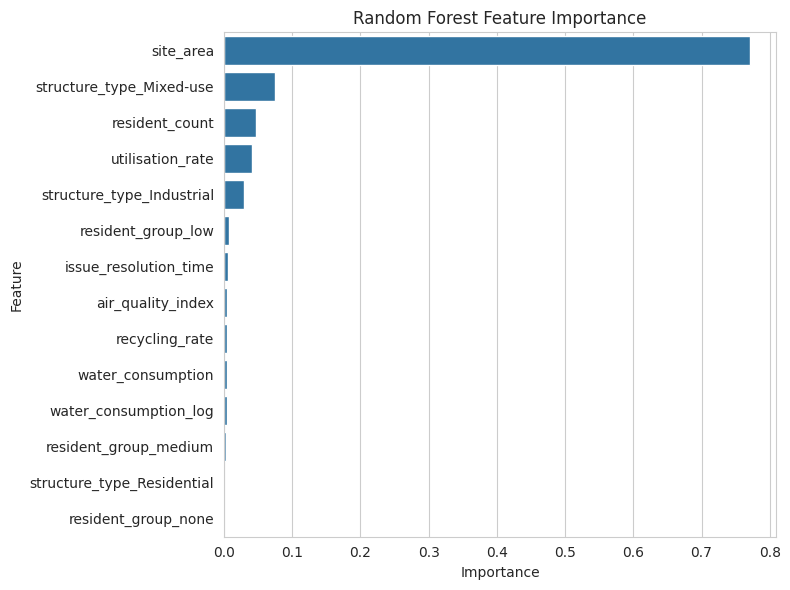

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=rf_feature_importance
)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig(f"{file_path}/feature_importance.png", bbox_inches="tight")
plt.show()

In [42]:
print(f"All model objects and files saved to {file_path}")

All model objects and files saved to outputs/ml_pipeline/electricity_cost/v1


---

# Conclusions

This notebook demonstrated a complete and well-structured machine learning workflow to predict electricity cost based on site and operational characteristics.

Key outcomes include:
* Successful development of a baseline Linear Regression model to establish interpretability and reference performance.
* Implementation of a Random Forest Regressor that significantly improved predictive accuracy.
* Clear comparison and justification for selecting the Random Forest model as the final solution.
* Strong alignment between model results and Business Requirement 2.

Overall, the project delivers a reliable, accurate, and business-relevant predictive model supported by transparent evaluation and interpretation.

# Next Steps

* Develop a Streamlit dashboard allowing users to input site characteristics and obtain predicted electricity cost estimates.
* Integrate the trained Random Forest model and preprocessing pipeline into the dashboard
* Finalise project documentation (README) to clearly communicate objectives, methodology, results, and limitations
* Prepare the project for deployment (on Heroku) to enable external access and demonstration